In [1]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# from tensorflow.keras.applications.vgg16 import preprocess_input

# Both Category and Landmark 

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

target_size = (320, 320, 3)

def load_images_and_labels(base_path):
    images = []
    category_labels = []
    landmark_labels = []
    category_label_to_idx = {}
    landmark_label_to_idx = {}
    category_idx = None
    
    # categories
    categories = ['Pagodas','Pyramids','Modern','Gothic','Mughal','Neoclassical']
    
    # landmarks
    landmarks = [
        'TianningTemplePagoda','ThienMuPagoda','GiantWildGoosePagoda','ShwedagonPagoda','FogongTemplePagoda','Pyramid of Giza','Pyramid of Djoser','Santa Cecilia Acatitlan Pyramid','El Castillo, Chichen Itza','Louvre Pyramid','Chrysler Building','Cathedral of Brasília','CCTV Headquarters','Hallgrímskirkja','eiffel','St.VitusCathedral','MilanCathedral','ChartresCathedral','CologneCathedral','Notre-DameCathedral',
        'Taj Mahal','Tomb of Akbar','Jama Masjid','Tomb of I_timad-ud-Daulah',
        'Bibi Ka Maqbara','Buckingham Palace','Concertgebouw','Academy of Athens','Panthéon','Ripon Building','other']
    category_idx = 0
    landmark_idx = 0

    for category in os.listdir(base_path):
        if category == '.DS_Store':
            continue
        category_path = os.path.join(base_path, category)
        category_label_to_idx[category] = category_idx

        for landmark in os.listdir(category_path):
            if landmark == '.DS_Store':
                continue
            landmark_path = os.path.join(category_path, landmark)
            if landmark not in landmark_label_to_idx:
                landmark_label_to_idx[landmark] = len(landmark_label_to_idx)

            for image_name in os.listdir(landmark_path):
                if image_name == '.DS_Store':
                    continue
                image_path = os.path.join(landmark_path, image_name)
                try:
                    image = load_img(image_path, target_size=target_size)
                    image = img_to_array(image)

                    images.append(image)
                    category_labels.append(category_idx)
                    landmark_labels.append(landmark_label_to_idx[landmark])
                except:
                    print(f"Skipping image {image_path} due to UnidentifiedImageError")
            
            landmark_idx += 1
        
        category_idx += 1

    images = np.array(images)
    category_labels = np.array(category_labels)
    landmark_labels = np.array(landmark_labels)

    return images, category_labels, landmark_labels, category_label_to_idx, landmark_label_to_idx

In [3]:
data_base_path = 'Landmarks-v1_1'
images, category_labels, landmark_labels, category_label_to_idx, landmark_label_to_idx = load_images_and_labels(data_base_path)

Skipping image Landmarks-v1_1/Neoclassical/Buckingham Palace/Buckingham Palace_19.jpg due to UnidentifiedImageError
Skipping image Landmarks-v1_1/Neoclassical/Academy of Athens/Academy of Athens - 20.jpg due to UnidentifiedImageError
Skipping image Landmarks-v1_1/Mughal/Bibi Ka Maqbara/Bibi Ka Maqbara - 14.jpg due to UnidentifiedImageError


In [4]:
category_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [5]:
landmark_label_to_idx.keys()

dict_keys(['TianningTemplePagoda', 'ThienMuPagoda', 'GiantWildGoosePagoda', 'ShwedagonPagoda', 'FogongTemplePagoda', 'Buckingham Palace', 'Concertgebouw', 'Panth‚on', 'Academy of Athens', 'Ripon Building', 'Pyramid of Giza', 'Pyramid of Djoser', 'Santa Cecilia Acatitlan Pyramid', 'El Castillo, Chichen Itza', 'Louvre Pyramid', 'Hallgr¡mskirkja', 'Chrysler Building', 'CCTV Headquarters', 'eiffel', 'Cathedral of Bras”lia', 'Tomb of I_timad-ud-Daulah', 'Taj Mahal', 'Tomb of Akbar', 'Jama Masjid', 'Bibi Ka Maqbara', 'St.VitusCathedral', 'MilanCathedral', 'ChartresCathedral', 'CologneCathedral', 'Notre-DameCathedral'])

In [6]:
category_label_to_idx.keys()

dict_keys(['Pagodas', 'Neoclassical', 'Pyramids', 'Modern', 'Mughal', 'Gothic'])

In [7]:
# Split the data into train and split

from sklearn.model_selection import train_test_split

train_images, val_images, train_category_labels, val_category_labels, train_landmark_labels, val_landmark_labels = train_test_split(
    images, category_labels, landmark_labels, test_size=0.33, random_state=42)

In [8]:
train_category_labels

array([2, 5, 2, 4, 1, 2, 2, 1, 2, 1, 5, 2, 3, 2, 2, 5, 4, 0, 2, 5, 2, 5,
       3, 0, 1, 2, 2, 0, 4, 5, 2, 2, 0, 4, 1, 1, 3, 3, 2, 5, 3, 4, 4, 5,
       1, 4, 2, 2, 3, 1, 0, 3, 1, 1, 2, 4, 1, 4, 0, 0, 0, 2, 1, 4, 2, 2,
       0, 4, 4, 3, 3, 4, 5, 1, 2, 4, 1, 5, 4, 5, 3, 3, 4, 2, 3, 4, 3, 4,
       1, 0, 0, 4, 2, 3, 1, 2, 4, 4, 4, 5, 1, 5, 4, 5, 4, 3, 5, 3, 2, 3,
       1, 2, 2, 2, 5, 0, 3, 2, 1, 1, 3, 4, 4, 1, 5, 1, 4, 1, 4, 0, 5, 0,
       1, 3, 2, 2, 0, 0, 0, 2, 2, 4, 4, 3, 1, 0, 3, 5, 5, 2, 0, 4, 2, 4,
       3, 4, 0, 3, 5, 1, 3, 5, 3, 2, 1, 4, 3, 0, 0, 0, 3, 2, 5, 0, 4, 3,
       3, 4, 2, 5, 2, 0, 1, 1, 0, 0, 4, 0, 2, 0, 5, 4, 3, 4, 5, 3, 2, 3,
       4, 5, 3, 5, 5, 4, 3, 2, 2, 0, 3, 2, 4, 3, 1, 0, 0, 0, 1, 2, 0, 3,
       1, 4, 0, 4, 3, 3, 0, 4, 1, 3, 2, 4, 5, 1, 4, 5, 4, 3, 0, 5, 0, 2,
       2, 5, 2, 2, 0, 0, 4, 3, 3, 0, 4, 2, 3, 2, 5, 4, 4, 3, 4, 2, 1, 2,
       5, 1, 5, 1, 4, 3, 1, 5, 0, 2, 1, 1, 3, 5, 1])

In [9]:
import tensorflow as tf

num_categories = len(category_label_to_idx)
num_landmarks = len(landmark_label_to_idx)

train_category_labels = tf.keras.utils.to_categorical(train_category_labels, num_classes=num_categories)
val_category_labels = tf.keras.utils.to_categorical(val_category_labels, num_classes=num_categories)

train_landmark_labels = tf.keras.utils.to_categorical(train_landmark_labels, num_classes=num_landmarks)
val_landmark_labels = tf.keras.utils.to_categorical(val_landmark_labels, num_classes=num_landmarks)

In [10]:
# Fine tune the model
from tensorflow.keras import layers, models, Model
import keras_tuner as kt
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K
from tensorflow import keras
from tensorflow.keras.applications.efficientnet import preprocess_input

K.clear_session()

def build_model(hp):
    base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=target_size)
    
    data_augmentation = keras.Sequential([
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.2),
        preprocessing.RandomZoom(0.2),
        preprocessing.RandomContrast(0.2)
    ])

    # Add the custom layers
    inputs = layers.Input(shape=target_size)
    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(hp.Int("units", min_value=32, max_value=1024, step=32), activation="relu")(x)
    x = layers.Dropout(hp.Float("dropout", 0, 0.5, step=0.1))(x)

    # Add category output layer
    category_output = layers.Dense(num_categories, activation="softmax", name="category_output")(x)

    # Add landmark output layer
    landmark_output = layers.Dense(num_landmarks, activation="softmax", name="landmark_output")(x)
    
    optimizer_type = hp.Choice("optimizer", values=["adam", "sgd", "rmsprop"])

    if optimizer_type == "adam":
        optimizer = tf.keras.optimizers.Adam(
            learning_rate=hp.Float("adam_lr", min_value=1e-5, max_value=1e-3, sampling="LOG")
        )
    elif optimizer_type == "sgd":
        optimizer = tf.keras.optimizers.SGD(
            learning_rate=hp.Float("sgd_lr", min_value=1e-5, max_value=1e-3, sampling="LOG"),
            momentum=hp.Float("sgd_momentum", min_value=0.0, max_value=0.99)
        )
    else:  # optimizer_type == "rmsprop"
        optimizer = tf.keras.optimizers.RMSprop(
            learning_rate=hp.Float("rmsprop_lr", min_value=1e-5, max_value=1e-3, sampling="LOG")
        )

    # Create the model
    model = Model(inputs=inputs, outputs=[category_output, landmark_output])

    base_model.trainable = False

    model.compile(optimizer=optimizer,
                  loss="categorical_crossentropy", metrics=["accuracy"])

    return model

In [11]:
from keras_tuner import Objective

early_stopping = EarlyStopping(monitor="val_landmark_output_accuracy", patience=5, restore_best_weights=True)

random_search_tuner = kt.RandomSearch(
    build_model, objective=Objective("val_landmark_output_accuracy", direction="max"),
    max_trials=30, executions_per_trial=3,
    overwrite=False, directory="group",
    project_name = "group_project3", seed=42
)

random_search_tuner.search(train_images, {"category_output": train_category_labels,
                                          "landmark_output":train_landmark_labels},
                           validation_data=(val_images, {"category_output": val_category_labels, 
                                                         "landmark_output": val_landmark_labels}),
                           epochs=40,
                           callbacks=[early_stopping])


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
672               |672               |units
0                 |0                 |dropout
sgd               |sgd               |optimizer
3.4974e-05        |3.4974e-05        |adam_lr

Epoch 1/40


2023-04-26 21:21:53.028583: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/9 [===================>..........] - ETA: 2s - loss: 5.3369 - category_output_loss: 1.8124 - landmark_output_loss: 3.5245 - category_output_accuracy: 0.1979 - landmark_output_accuracy: 0.0156 

In [ ]:
# best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]

# best_trial.summary()

In [ ]:
# Load the base model
from tensorflow.keras.applications import EfficientNetB0
import random
from tensorflow import keras
from tensorflow.keras import layers, models, Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications.efficientnet import preprocess_input


from keras import backend as K

seed_value = 42
# Set the seed for Python's random module
random.seed(seed_value)

# Set the seed for NumPy
np.random.seed(seed_value)

# Set the seed for TensorFlow
tf.random.set_seed(seed_value)


K.clear_session()
base_model = EfficientNetB0(include_top=False, weights="imagenet", input_shape=target_size)

# base_model = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
base_model.trainable = False

data_augmentation = keras.Sequential([
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.2),
        preprocessing.RandomZoom(0.2),
        preprocessing.RandomContrast(0.1)
    ])

# Add the custom layers
inputs = layers.Input(shape=target_size)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
#x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Add category output layer
category_output = layers.Dense(num_categories, activation="softmax", name="category_output")(x)

# Add landmark output layer
landmark_output = layers.Dense(num_landmarks, activation="softmax", name="landmark_output")(x)

# Create the model
model = Model(inputs=inputs, outputs=[category_output, landmark_output])

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000738),
              loss={"category_output": "categorical_crossentropy",
                    "landmark_output": "categorical_crossentropy"},
              metrics={"category_output": "accuracy",
                       "landmark_output": "accuracy"})

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_landmark_output_accuracy", patience=5, restore_best_weights=True)

history = model.fit(train_images,
                    {"category_output": train_category_labels,
                     "landmark_output": train_landmark_labels},
                    validation_data=(val_images,
                                     {"category_output": val_category_labels,
                                      "landmark_output": val_landmark_labels}),
                    epochs=50,
                    callbacks = [early_stopping])

Epoch 1/50


9/9 [==============================] - 12s 1s/step - loss: 5.1208 - category_output_loss: 1.6853 - landmark_output_loss: 3.4354 - category_output_accuracy: 0.3154 - landmark_output_accuracy: 0.0538 - val_loss: 4.5389 - val_category_output_loss: 1.3514 - val_landmark_output_loss: 3.1875 - val_category_output_accuracy: 0.6304 - val_landmark_output_accuracy: 0.2029
Epoch 2/50
9/9 [==============================] - 8s 940ms/step - loss: 4.1548 - category_output_loss: 1.1619 - landmark_output_loss: 2.9929 - category_output_accuracy: 0.6738 - landmark_output_accuracy: 0.1900 - val_loss: 3.9083 - val_category_output_loss: 0.9602 - val_landmark_output_loss: 2.9481 - val_category_output_accuracy: 0.8623 - val_landmark_output_accuracy: 0.2826
Epoch 3/50
9/9 [==============================] - 8s 943ms/step - loss: 3.5203 - category_output_loss: 0.8552 - landmark_output_loss: 2.6650 - category_output_accuracy: 0.7849 - landmark_output_accuracy: 0.3082 - val_loss: 3.3247 - val_category_output_loss:

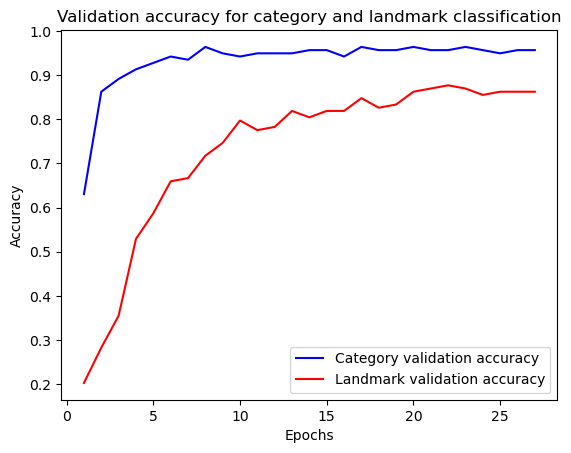

In [ ]:
import matplotlib.pyplot as plt

# Get the accuracy data
category_val_acc = history.history['val_category_output_accuracy']
landmark_val_acc = history.history['val_landmark_output_accuracy']

# Get the number of epochs
epochs = range(1, len(category_val_acc) + 1)

# Plot the accuracy data
plt.plot(epochs, category_val_acc, 'b', label='Category validation accuracy')
plt.plot(epochs, landmark_val_acc, 'r', label='Landmark validation accuracy')
plt.title('Validation accuracy for category and landmark classification')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

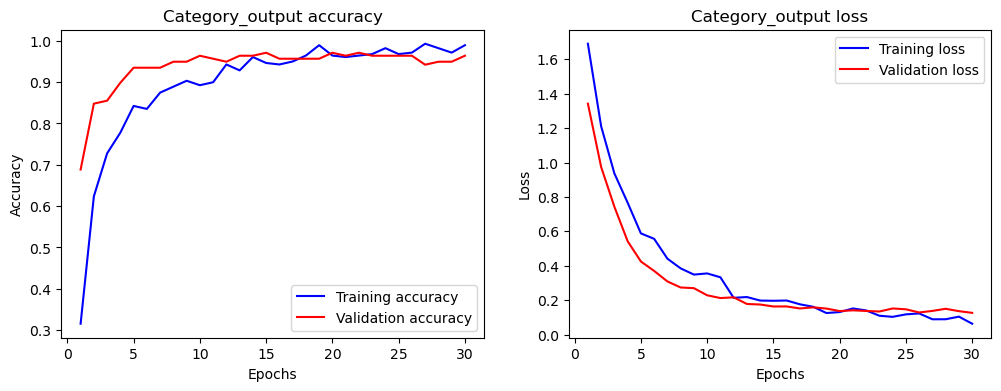

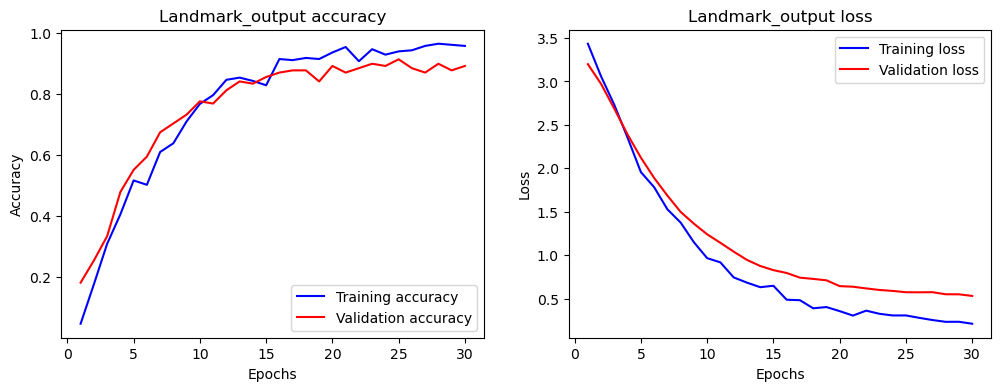

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history, output_name):
    # Get accuracy and loss data
    acc = history.history[f'{output_name}_accuracy']
    val_acc = history.history[f'val_{output_name}_accuracy']
    loss = history.history[f'{output_name}_loss']
    val_loss = history.history[f'val_{output_name}_loss']

    # Get the number of epochs
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'{output_name.capitalize()} accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'{output_name.capitalize()} loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot metrics for category output
plot_metrics(history, 'category_output')

# Plot metrics for landmark output
plot_metrics(history, 'landmark_output')


1. fine tuner
2. visualization
3.  

In [ ]:
model.save("my_model_256.h5")

In [ ]:
model.save('my_model.h5')

In [ ]:
model.save("my_saved_model")

INFO:tensorflow:Assets written to: my_saved_model/assets


INFO:tensorflow:Assets written to: my_saved_model/assets


In [ ]:
from tensorflow.keras.models import load_model

model_path = "/Users/lizhiqian/Desktop/USC/DSCI 552/Yao/Group Project/my_model.h5"
model = load_model(model_path)

In [ ]:
# # For Vocareum
# from tensorflow.keras.models import load_model
# import os
# import pandas as pd
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.models import load_model
# from tensorflow.keras.applications.efficientnet import preprocess_input
# from tensorflow.keras.applications import EfficientNetB0

# def model_prediction(test_dir):
#     return test_dir
#     # categories
#     categories = ['Pagodas','Pyramids','Modern','Gothic','Mughal','Neoclassical']

#     # landmarks
#     landmarks = [
#         'TianningTemplePagoda','ThienMuPagoda','GiantWildGoosePagoda','ShwedagonPagoda',
#         'FogongTemplePagoda','Pyramid of Giza','Pyramid of Djoser','Santa Cecilia Acatitlan Pyramid',
#         'El Castillo, Chichen Itza','Louvre Pyramid','Chrysler Building','Cathedral of Brasília',
#         'CCTV Headquarters','Hallgrímskirkja','eiffel','St.VitusCathedral',
#         'MilanCathedral','ChartresCathedral','CologneCathedral','Notre-DameCathedral',
#         'Taj Mahal','Tomb of Akbar','Jama Masjid','Tomb of I_timad-ud-Daulah',
#         'Bibi Ka Maqbara','Buckingham Palace','Concertgebouw',
#         'Academy of Athens','Panthéon','Ripon Building','other']
#     results = []
#     random.seed(10)
    
#     # Load the trained model with saved weight from local 
#     current_path = os.getcwd()
#     print("Current working directory:", current_path)
#     model_path = "/mnt/vocwork4/ddd_v1_w_8IBr_961141/asn1748245_11/asn1748246_1/work/my_model.h5"
#     model = load_model(model_path)
#     print(type(model))
    
#     categories = os.listdir(image_directory)
    
#     for category in categories:
#         # get the category path
#         category_path = os.path.join(test_dir, category)
        
#         landmarks = os.listdir(category_path)
#         for landmark in landmarks:
#             # get the landmark path
#             landmark_path = os.path.join(category_path, landmark)
#             image_files = os.listdir(landmark_path)
            
#             for img_file in image_files:
#                 img_path = os.path.join(landmark_path, img_file)
                
#                 # Load the image and preprocess it
#                 img = image.load_img(img_path, target_size=(224, 224))
#                 img_array = image.img_to_array(img)
#                 img_array = preprocess_input(img_array)  # Use EfficientNet's preprocess_input function
#                 img_array = tf.expand_dims(img_array, axis=0)
                
#                 # Make the prediction
#                 predictions = model.predict(img_array)
#                 category_pred, landmark_pred = predictions

#                 # Get the confidence
#                 category_confidence = max(category_pred) * 100
#                 landmark_confidence = max(landmark_pred) * 100

#                 category_index = category_pred.argmax()
#                 landmark_index = landmark_pred.argmax()

#                 results.append({
#                     'image': img_file,
#                     'category': categories[category_index],
#                     'category_confidence': category_confidence,
#                     'landmark': landmarks[landmark_index],
#                     'landmark_confidence': landmark_confidence,
#                 })
    
# #     prediction = pd.DataFrame(
# #         results, 
# #         columns = ['image', 'category', 'category_confidence', 'landmark', 'landmark_confidence'])
# #     return prediction #data frame
#     return pd.DataFrame(results)

In [ ]:
# Predict on the Validation set
from sklearn.metrics import f1_score

def preprocess_and_predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    return predictions

# for img in val_images:
#     category_val_pred, landmark_val_pred = model.predict(img)
#     category_val_preds.append(category_val_pred.argmax())
#     landmark_val_preds.append(landmark_val_preds)

category_val_pred, landmark_val_pred = model.predict(val_images)
# category_val_preds.append(category_val_pred.argmax())
# landmark_val_preds.append(landmark_val_preds)
    
# # Calculate the F1 macro scores for category and landmark classification
# category_f1_macro = f1_score(val_category_labels, category_val_preds, average="macro")
# landmark_f1_macro = f1_score(val_landmark_labels, landmark_val_preds, average="macro")


5/5 [==============================] - 2s 293ms/step


In [ ]:
pred_category_labels = category_val_pred.round(3).argmax(axis=-1)
pred_landmark_labels = landmark_val_pred.round(3).argmax(axis=-1)
pred_landmark_labels

array([11, 28, 29,  6,  5, 29, 27, 15,  2,  3, 25, 16, 28,  2, 29, 20,  7,
       16, 23,  5,  6, 21, 19, 23, 22,  6,  0,  7, 20,  5, 13,  9,  4, 15,
       29, 25,  5, 17,  2, 27, 20, 29, 16, 26, 13,  9,  8,  0,  1, 28, 19,
       12, 19, 10,  8, 25, 10,  0, 27, 12, 28, 27, 17,  5,  3, 17,  5, 15,
       25, 10, 24,  1,  3, 19, 26, 25, 17,  4,  9,  1,  1,  4, 12,  2, 20,
       25, 15,  6, 20, 11,  0,  3,  8, 25, 18,  1, 28, 25, 21,  0,  1, 15,
        4, 14, 25,  4, 26, 27, 28,  9,  9, 17,  1,  0, 22, 17,  7,  7, 14,
        2,  9, 28,  8, 24,  8, 17,  5,  9, 19, 19, 14, 27, 26, 22, 18, 10,
       13,  7])

In [ ]:
tru_category_labels = val_category_labels.argmax(axis=-1)
tru_landmark_labels = val_landmark_labels.argmax(axis=-1)

In [ ]:
category_f1_macro = f1_score(pred_category_labels, tru_category_labels, average="macro")
landmark_f1_macro = f1_score(pred_landmark_labels, tru_landmark_labels, average="macro")

In [ ]:
category_f1_macro

0.9615244870621215

In [ ]:
landmark_f1_macro

0.9179617604617605

In [ ]:
landmark_label_to_idx

{'TianningTemplePagoda': 0,
 'ThienMuPagoda': 1,
 'GiantWildGoosePagoda': 2,
 'ShwedagonPagoda': 3,
 'FogongTemplePagoda': 4,
 'Buckingham Palace': 5,
 'Concertgebouw': 6,
 'Panth‚on': 7,
 'Academy of Athens': 8,
 'Ripon Building': 9,
 'Pyramid of Giza': 10,
 'Pyramid of Djoser': 11,
 'Santa Cecilia Acatitlan Pyramid': 12,
 'El Castillo, Chichen Itza': 13,
 'Louvre Pyramid': 14,
 'Hallgr¡mskirkja': 15,
 'Chrysler Building': 16,
 'CCTV Headquarters': 17,
 'eiffel': 18,
 'Cathedral of Bras”lia': 19,
 'Tomb of I_timad-ud-Daulah': 20,
 'Taj Mahal': 21,
 'Tomb of Akbar': 22,
 'Jama Masjid': 23,
 'Bibi Ka Maqbara': 24,
 'St.VitusCathedral': 25,
 'MilanCathedral': 26,
 'ChartresCathedral': 27,
 'CologneCathedral': 28,
 'Notre-DameCathedral': 29}

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.applications.efficientnet import preprocess_input

# Load and preprocess the image
img_path = "Landmarks-v1_1/Gothic/MilanCathedral"

def model_prediction(test_dir):
    # categories
    categories = ['Pagodas', 'Neoclassical', 'Pyramids', 'Modern', 'Mughal', 'Gothic']

    # landmarks
    landmarks = [
        'TianningTemplePagoda', 'ThienMuPagoda', 'GiantWildGoosePagoda', 
        'ShwedagonPagoda', 'FogongTemplePagoda', 'Buckingham Palace', 'Concertgebouw', 
        'Panth‚on', 'Academy of Athens', 'Ripon Building', 'Pyramid of Giza', 'Pyramid of Djoser', 
        'Santa Cecilia Acatitlan Pyramid', 'El Castillo, Chichen Itza', 'Louvre Pyramid', 'Hallgr¡mskirkja', 
        'Chrysler Building', 'CCTV Headquarters', 'eiffel', 'Cathedral of Bras”lia', 
        'Tomb of I_timad-ud-Daulah', 'Taj Mahal', 'Tomb of Akbar', 'Jama Masjid', 
        'Bibi Ka Maqbara', 'St.VitusCathedral', 'MilanCathedral', 'ChartresCathedral', 
        'CologneCathedral', 'Notre-DameCathedral']
    results = []
    
    # Load the trained model with saved weight from local 
    model_path = "my_model_256.h5"
    model = load_model(model_path)
    
    
    for img_name in os.listdir(test_dir):
        img_path = os.path.join(test_dir, img_name)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(240, 240))     
        img_array = image.img_to_array(img)     
        img_array = tf.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)  # Use EfficientNet's preprocess_input function

        # Make the prediction
        predictions = model.predict(img_array)

        # Extract category and landmark confidences
        category_probabilities = predictions[0]  # Assuming category output is the first branch
        category_confidence = np.max(category_probabilities)
        category_index = np.argmax(category_probabilities)

        landmark_probabilities = predictions[1]  # Assuming landmark output is the second branch
        landmark_confidence = np.max(landmark_probabilities)
        landmark_index = np.argmax(landmark_probabilities)
        
        results.append([
            img_name,
            categories[category_index],
            category_confidence,
            landmarks[landmark_index],
            landmark_confidence
        ])

    prediction = pd.DataFrame(
        results, 
        columns = ['image', 'category', 'category_confidence', 'landmark', 'landmark_confidence'])
    return prediction #data frame



In [ ]:
model_prediction(img_path)

1/1 [==============================] - 0s 32ms/step


,image,category,category_confidence,landmark,landmark_confidence
0,MilanCathedral2.jpeg,Gothic,0.997934,MilanCathedral,0.873089
1,MilanCathedral10.jpeg,Gothic,0.999241,MilanCathedral,0.827370
2,MilanCathedral16.jpeg,Gothic,0.992122,MilanCathedral,0.702247
3,MilanCathedral4.jpeg,Gothic,0.996031,MilanCathedral,0.748128
4,MilanCathedral9.jpeg,Gothic,0.995515,MilanCathedral,0.789155
5,MilanCathedral17.jpeg,Gothic,0.981858,MilanCathedral,0.402655
6,MilanCathedral6.jpeg,Gothic,0.995372,MilanCathedral,0.695954
7,MilanCathedral18.jpeg,Gothic,0.983937,MilanCathedral,0.590211
8,MilanCathedral19.jpeg,Gothic,0.998398,MilanCathedral,0.408952
9,MilanCathedral7.jpeg,Gothic,0.995274,MilanCathedral,0.396173
